In [84]:
# Kemp Carswell 801017179
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('C:/Users/kemp/Downloads/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)

In [86]:
housing = pd.DataFrame(pd.read_csv('C:/Users/kemp/Downloads/Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [88]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = np.random)

In [89]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,1,0,0,0,1,0,0,3143000
392,3990,3,1,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,0,0,1,0,0,0,0,4340000
250,3510,3,1,1,0,0,0,0,0,0,4515000


In [90]:
X_Training = df_Newtrain.values[:,0:10]
y_Training = df_Newtrain.values[:,10]

X_Test = df_Newtest.values[:,0:10]
y_Test = df_Newtest.values[:,10]

In [91]:
mean = np.ones(X_Training.shape[1])
std = np.ones(X_Training.shape[1])
for i in range(0, X_Training.shape[1]):
    mean[i] = np.mean(X_Training.transpose()[i])
    std[i] = np.std(X_Training.transpose()[i])
    for j in range(0, X_Training.shape[0]):
        X_Training[j][i] = (X_Training[j][i] - mean[i])/std[i]

In [92]:
mean = np.ones(X_Test.shape[1])
std = np.ones(X_Test.shape[1])
for i in range(0, X_Test.shape[1]):
    mean[i] = np.mean(X_Test.transpose()[i])
    std[i] = np.std(X_Test.transpose()[i])
    for j in range(0, X_Test.shape[0]):
        X_Test[j][i] = (X_Test[j][i] - mean[i])/std[i]

In [93]:
def compute_cost(X, n, theta):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [94]:
def gradient_descent(X, y, theta, alpha, iterations, n, h):
    cost = np.ones(iterations)
    for i in range(0,iterations):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = compute_cost(X, n, theta)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [95]:
def linear_regression(X, y, alpha, iterations):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = compute_cost(X, n, theta)
    theta, cost = gradient_descent(X, y, theta, alpha, iterations, n, h)
    return theta, cost

In [96]:
iterations = 500;
alpha = 0.1;
alpha2 = 0.01

In [97]:
theta_Training, cost_Training = linear_regression(X_Training, y_Training, alpha, iterations)
print('Final value of theta with an alpha of ', alpha,' =', theta_Training)
cost_Training = list(cost_Training)
n_ierations_Training = [x for x in range(1,(iterations + 1))]

Final value of theta with an alpha of  0.1  = [[3670731.06244055  551896.57649369  385795.47482823  992491.61099674
   406487.69378465  296569.19055127  109169.67597818  340894.17909666
  1248570.78075159  254848.24455347  899005.83201632]]


In [98]:
theta_Training2, cost_Training2 = linear_regression(X_Training, y_Training, alpha2, iterations)
print('Final value of theta with an alpha of ', alpha2,' =', theta_Training2)
cost_Training2 = list(cost_Training2)
n_ierations_Training2 = [x for x in range(1,(iterations + 1))]

Final value of theta with an alpha of  0.01  = [[3237989.41217222  547127.46438364  247032.84559761 1022333.00298265
   153039.07459016  364712.32134447  470973.32733094  381655.9909572
  1307691.88614664  604186.7049498   911391.41717596]]


In [99]:
theta_Test, cost_Test = linear_regression(X_Test, y_Test, alpha, iterations)
print('Final value of theta with an alpha of ', alpha,' =', theta_Test)
cost_Test = list(cost_Test)
n_ierations_Test = [x for x in range(1,(iterations + 1))]

Final value of theta with an alpha of  0.1  = [[3665283.80998753  741402.85068115  264657.01674763  992948.00356364
   305680.32344454  126509.594599    265573.12956302   96887.61766261
  1318395.63714537  574221.3020385   498783.75949985]]


In [100]:
theta_Test2, cost_Test2 = linear_regression(X_Test, y_Test, alpha2, iterations)
print('Final value of theta with an alpha of ', alpha2,' =', theta_Test2)
cost_Test2 = list(cost_Test2)
n_ierations_Test2 = [x for x in range(1,(iterations + 1))]

Final value of theta with an alpha of  0.01  = [[3211733.75281949  791345.02851107  162838.95231366 1164613.49088194
    51779.18076014  239993.96046932  566736.95476624  137642.82043416
  1204854.90843431  783960.095531    689075.93949973]]


Text(0.5, 1.0, 'Convergence of gradient descent')

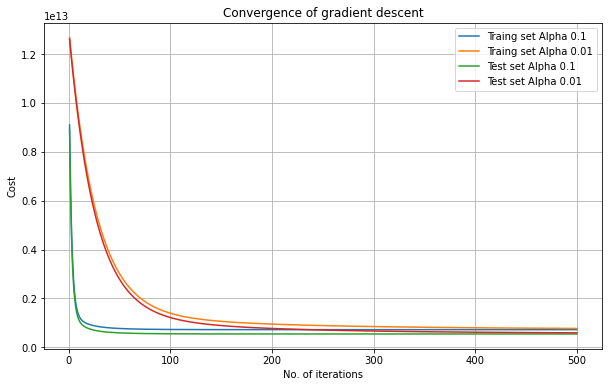

In [101]:
plt.plot(n_ierations_Training, cost_Training, label='Traing set Alpha 0.1')
plt.plot(n_ierations_Training2, cost_Training2, label='Traing set Alpha 0.01')
plt.plot(n_ierations_Test, cost_Test, label='Test set Alpha 0.1')
plt.plot(n_ierations_Test2, cost_Test2, label='Test set Alpha 0.01')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')